In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("D:/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
data.shape

(200, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


#### Observations:
1. customerID data is evenly distributed.
2. Gender data has 2 unique values male and female. Mostly female customer are present in the data.
3. Age data is right skewed.
4. Outliers is present in the data.

In [11]:
# Check for missing values.
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:ylabel='Age'>

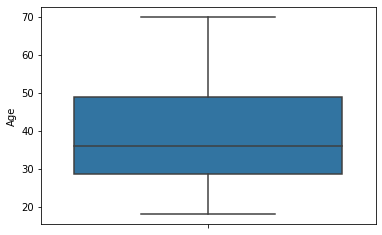

In [12]:
# checking for outliers
sns.boxplot(y = data['Age'])

C:\Users\Hemchandra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

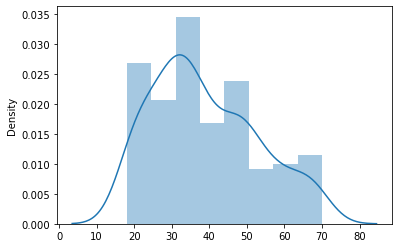

In [117]:
sns.distplot(x=data['Age'])

<AxesSubplot:ylabel='Annual Income (k$)'>

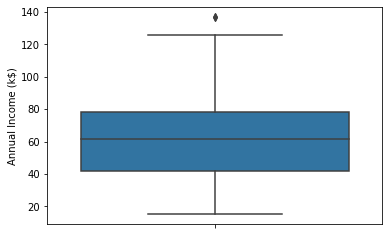

In [13]:
sns.boxplot(y = data['Annual Income (k$)'])

C:\Users\Hemchandra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

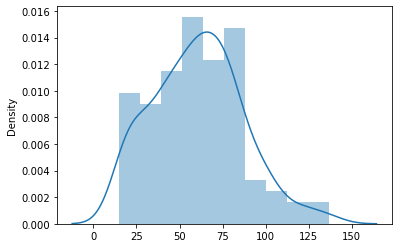

In [20]:
sns.distplot(x = data['Annual Income (k$)'])

In [21]:
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

In [22]:
# As we know that we can take value upper range of (Q1-1.5*QPR, Q3+1.5*QPR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('lower limit is', lower_limit)
print('upper limit is', upper_limit)

lower limit is -13.25
upper limit is 132.75


In [23]:
outliers_detected = []
for x in data['Annual Income (k$)']:
    if ((x> upper_limit) or (x<lower_limit)):
         outliers_detected.append(x)
print(' outlier in the dataset is', outliers_detected)

 outlier in the dataset is [137, 137]


In [24]:
# replacing it with the median value 
data.loc[data['Annual Income (k$)'] >= 137, 'Annual Income (k$)'] = data["Annual Income (k$)"].median()

<AxesSubplot:ylabel='Spending Score (1-100)'>

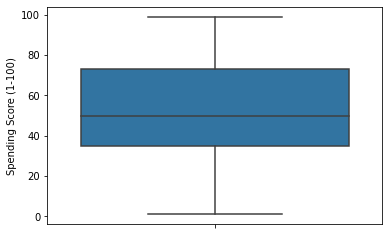

In [14]:
sns.boxplot(y = data['Spending Score (1-100)'])

C:\Users\Hemchandra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

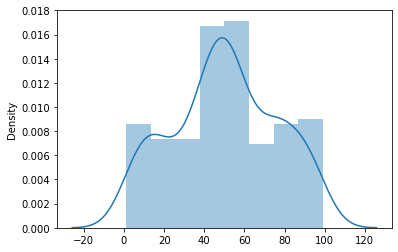

In [118]:
sns.distplot(x=data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

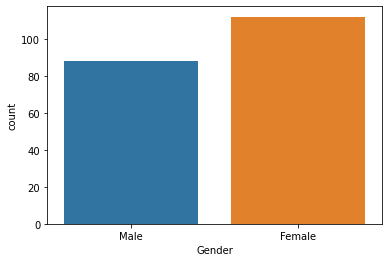

In [27]:
# Countplot for gender
sns.countplot(x=data['Gender'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

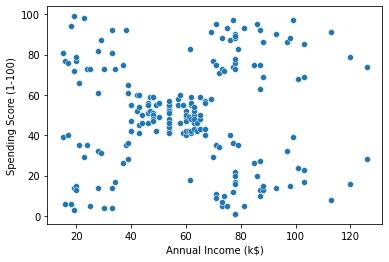

In [26]:
# Visualization between annual income and spending score
sns.scatterplot(x= data['Annual Income (k$)'], y = data['Spending Score (1-100)'])

In [32]:
cust = data['Gender']

del data['Gender']

In [33]:
samples = data.values
samples

array([[  1. ,  19. ,  15. ,  39. ],
       [  2. ,  21. ,  15. ,  81. ],
       [  3. ,  20. ,  16. ,   6. ],
       [  4. ,  23. ,  16. ,  77. ],
       [  5. ,  31. ,  17. ,  40. ],
       [  6. ,  22. ,  17. ,  76. ],
       [  7. ,  35. ,  18. ,   6. ],
       [  8. ,  23. ,  18. ,  94. ],
       [  9. ,  64. ,  19. ,   3. ],
       [ 10. ,  30. ,  19. ,  72. ],
       [ 11. ,  67. ,  19. ,  14. ],
       [ 12. ,  35. ,  19. ,  99. ],
       [ 13. ,  58. ,  20. ,  15. ],
       [ 14. ,  24. ,  20. ,  77. ],
       [ 15. ,  37. ,  20. ,  13. ],
       [ 16. ,  22. ,  20. ,  79. ],
       [ 17. ,  35. ,  21. ,  35. ],
       [ 18. ,  20. ,  21. ,  66. ],
       [ 19. ,  52. ,  23. ,  29. ],
       [ 20. ,  35. ,  23. ,  98. ],
       [ 21. ,  35. ,  24. ,  35. ],
       [ 22. ,  25. ,  24. ,  73. ],
       [ 23. ,  46. ,  25. ,   5. ],
       [ 24. ,  31. ,  25. ,  73. ],
       [ 25. ,  54. ,  28. ,  14. ],
       [ 26. ,  29. ,  28. ,  82. ],
       [ 27. ,  45. ,  28. ,  32. ],
 

# K-means clustering

In [34]:
from sklearn.cluster import KMeans

In [35]:
# For finding number of cluster we will use Elbow method
ks = range(1,10)
inertias = []

for k in ks:
    # Create a kmeans instance with k cluster: mode
    model = KMeans(n_clusters=k)
    
    #fit the model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

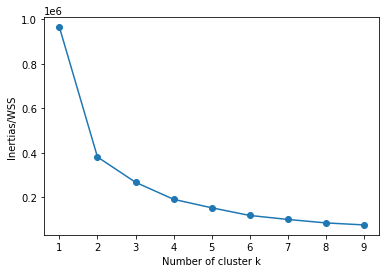

In [36]:
# plot ks vs inertia/WSS
plt.plot(ks,inertias, '-o')
plt.xlabel("Number of cluster k")
plt.ylabel("Inertias/WSS")
plt.xticks(ks)
plt.show()

So it looks like at 5, there is break so number of cluster can be five so we will plot the graph using number of cluster as k=5.

In [37]:
model = KMeans(n_clusters=5)

In [38]:
labels = model.fit_predict(samples)

In [39]:
labels[:5]

array([2, 2, 4, 2, 4])

In [40]:
df = pd.DataFrame({'labels':labels,'customers':cust})

In [41]:
ct = pd.crosstab(df['labels'],df['customers'])

In [42]:
ct

customers,Female,Male
labels,,
0,38,28
1,17,19
2,14,11
3,21,18
4,22,12


In [130]:
clustering_data = data.iloc[:,[2,3]].values

In [50]:
y = model.fit_predict(clustering_data)

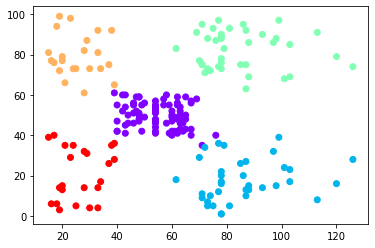

In [128]:
plt.scatter(x=data["Annual Income (k$)"],y = data["Spending Score (1-100)"],c=y,cmap = "rainbow")


# Hierarchical Clustering

In [53]:
from sklearn.preprocessing import normalize

In [93]:
data_new= pd.concat([data,cust], axis=1)

In [94]:
data_new.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15.0,39,Male
1,2,21,15.0,81,Male
2,3,20,16.0,6,Female
3,4,23,16.0,77,Female
4,5,31,17.0,40,Female


In [95]:
data_new.loc[data_new['Gender']=='Male','Gender']= 0
data_new.loc[data_new['Gender']=='Female','Gender']= 1

In [96]:
data_scaled = normalize(data_new)

In [98]:
data_scaled = pd.DataFrame(data_scaled, columns=data_new.columns)

In [99]:
data_scaled

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,0.021780,0.413826,0.326705,0.849433,0.000000
1,0.023520,0.246956,0.176397,0.952546,0.000000
2,0.113228,0.754851,0.603881,0.226455,0.037743
3,0.048755,0.280342,0.195020,0.938536,0.012189
4,0.093234,0.578052,0.316997,0.745874,0.018647
...,...,...,...,...,...
195,0.798286,0.142551,0.488747,0.321758,0.004073
196,0.821583,0.187671,0.525479,0.116773,0.004170
197,0.797894,0.128953,0.507751,0.298203,0.000000
198,0.940909,0.151302,0.290783,0.085107,0.000000


In [100]:
data_scaled.shape

(200, 5)

In [101]:
import scipy.cluster.hierarchy as hie

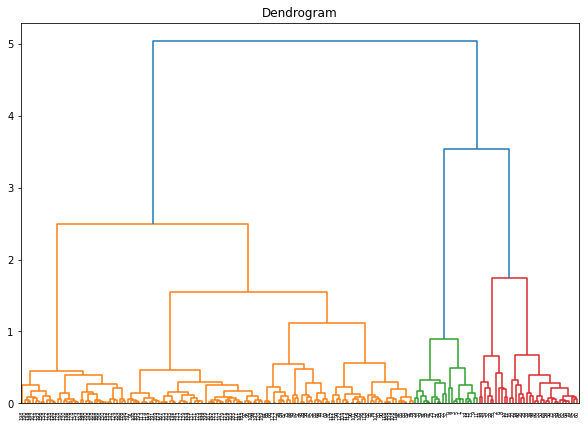

In [102]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = hie.dendrogram(hie.linkage(data_scaled, method='ward'))

In [103]:
from sklearn.cluster import AgglomerativeClustering

In [124]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [125]:
cluster.fit_predict(data_scaled)[:5]

array([2, 2, 1, 2, 2], dtype=int64)

In [126]:
Y = cluster.fit_predict(clustering_data)

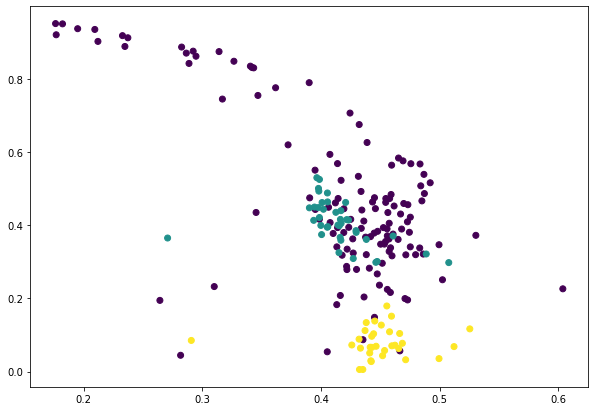

In [127]:
plt.figure(figsize=(10,7))
plt.scatter(x=data_scaled['Annual Income (k$)'],y=data_scaled['Spending Score (1-100)'], c=Y)